# The imports

In [42]:
import geopandas as gpd
import geoplot as gplt

import geoplot.crs as gcrs

# Loading the data

In [43]:
# Load Nepal district geometry data
map_data = gpd.read_file('/home/pratik/Projects/EQ map/data/nepal_map_data/nepal-districts.geojson')

# Lakes data, we only need the 2nd and 3rd columns
lakes_data = gpd.read_file('/home/pratik/Projects/EQ map/data/OpenDataNepal/NepalCBS/number-of-lakes-in-districts-by-altitude-in-nepal.csv').iloc[:, 1:3]

# Preprocess lakes data

In [47]:
# uppercase the district names, cast the count to int
lakes_data['District'] = lakes_data['District'].str.upper()
lakes_data['Total Lake'] = lakes_data['Total Lake'].astype(int)

# join lakes data and geodata
final_lakes_data = map_data.merge(lakes_data, how='inner', left_on=["DISTRICT"], right_on=["District"]).iloc[:,1:]

# Plot the data as a choropleth

<GeoAxesSubplot:>

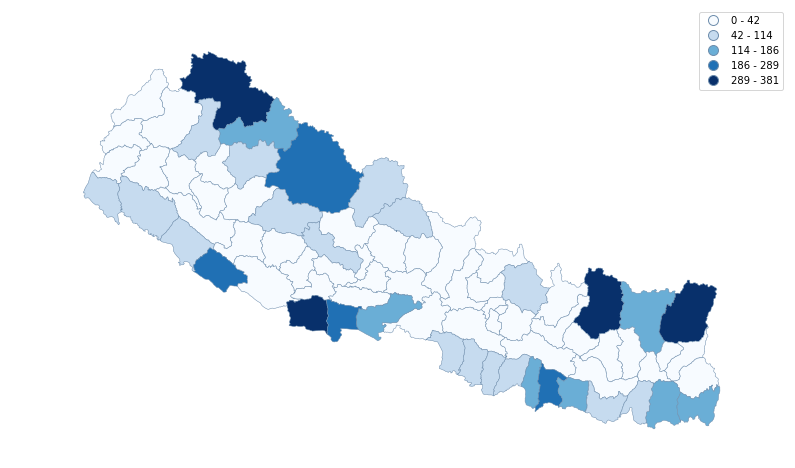

In [51]:
gplt.choropleth(
    final_lakes_data, hue='Total Lake', projection=gcrs.AlbersEqualArea(),
     linewidth=0.5, edgecolor='#6f8ead', figsize=(14,9),
    cmap='Blues', legend=True,
    scheme='FisherJenks'
)